In [10]:
with open('results2.txt') as f:
    content = f.readlines()[0]

content = content.replace('Iteration', '\nIteration')
info = [x for x in content.split('\n') if x]
info

['Iteration 1 - Successes: 76 / 251 (too easy: 12, too hard: 163)',
 'Iteration 2 - Successes: 51 / 147 (too easy: 9, too hard: 87)',
 'Iteration 3 - Successes: 24 / 354 (too easy: 0, too hard: 330)',
 'Iteration 4 - Successes: 3 / 449 (too easy: 0, too hard: 446)',
 'Iteration 5 - Successes: 0 / 432 (too easy: 0, too hard: 432)',
 'Iteration 6 - Successes: 3 / 246 (too easy: 0, too hard: 243)',
 'Iteration 7 - Successes: 34 / 140 (too easy: 7, too hard: 99)',
 'Iteration 8 - Successes: 36 / 159 (too easy: 10, too hard: 113)',
 'Iteration 9 - Successes: 29 / 159 (too easy: 9, too hard: 121)',
 'Iteration 10 - Successes: 45 / 141 (too easy: 13, too hard: 83)',
 'Iteration 11 - Successes: 25 / 282 (too easy: 1, too hard: 256)',
 'Iteration 12 - Successes: 15 / 314 (too easy: 0, too hard: 299)',
 'Iteration 13 - Successes: 7 / 343 (too easy: 6, too hard: 330)',
 'Iteration 14 - Successes: 11 / 347 (too easy: 0, too hard: 336)',
 'Iteration 15 - Successes: 14 / 337 (too easy: 0, too hard: 

In [33]:
import re
import numpy as np
import pandas as pd

regex =  re.compile('Iteration (\d+) - Successes: (\d+) / ([0-9]*) \(too easy: (\d+), too hard: (\d+)\)')

def parseLine(line):
    m = regex.match(line)
    return [int(x) for x in m.groups()]

parsed = [parseLine(line) for line in info]
df = pd.DataFrame(parsed, columns=['Iteration', 'Good', 'Total', 'Easy', 'Hard'])
df.head(5)

,Iteration,Good,Total,Easy,Hard
0,1,76,251,12,163
1,2,51,147,9,87
2,3,24,354,0,330
3,4,3,449,0,446
4,5,0,432,0,432


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

df["EasyNorm"] = df.Easy / df.Total
df["GoodNorm"] = df.Good / df.Total
df["HardNorm"] = df.Hard / df.Total

df.head(5)

# Make the plot
plt.figure(figsize=(16, 6))
plt.stackplot(range(1,len(df.Good) + 1),  df.GoodNorm,  df.EasyNorm,  df.HardNorm, labels=['Good','Too easy','Too Hard'])
plt.legend(loc='upper left')
plt.margins(0,0)
plt.xlabel("Iteration")
plt.ylabel("Percentage")
plt.title('Different types of starts over time')
plt.savefig("state.eps")
plt.savefig("state.png")
plt.show()


NameError: name 'df' is not defined

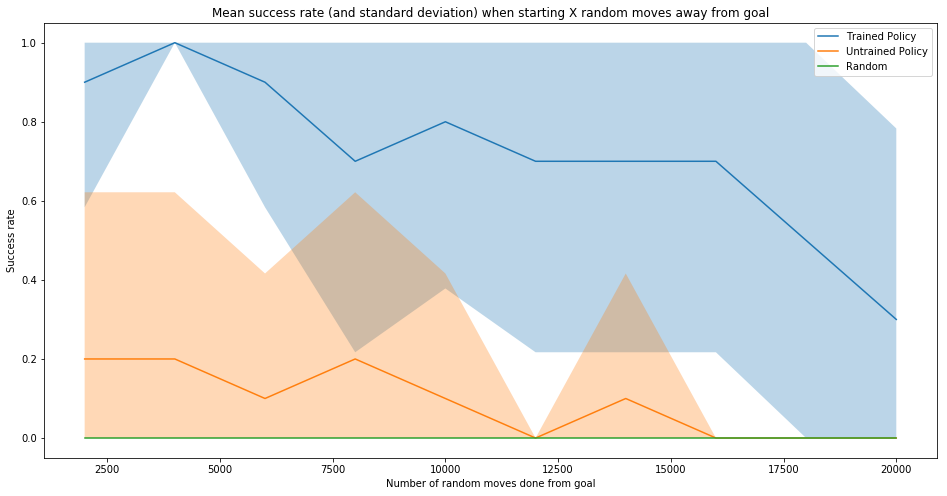

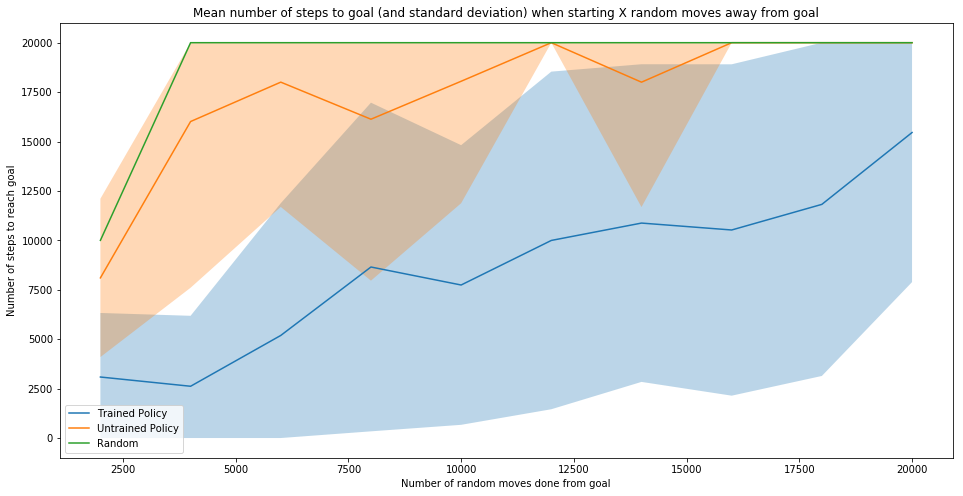

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

columns = ['explorationSteps', 'solvingSteps', 'iteration', 'done', 'numSteps']
dfTrained = pd.read_csv('performance.txt', names=columns, header=None)
dfUntrained = pd.read_csv('performanceUntrainted.txt', names=columns, header=None)
dfRandom = pd.read_csv('performanceRandom.txt', names=columns, header=None)
dfRandom.done = dfRandom.done.apply(lambda x: x == 'True').apply(float)

dfs = [dfTrained, dfUntrained, dfRandom]
names = ['Trained Policy', 'Untrained Policy', 'Random']


explorationSteps = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000]

#for name, niceName in zip(names, ['Policy', 'Untrained Policy', 'Random']):
    
means = [df.groupby('explorationSteps').mean() for df in dfs]
stds = [df.groupby('explorationSteps').std() for df in dfs]



plt.figure(figsize=(16, 8))
for std, mean, name in zip(stds, means, names):
    plt.plot(explorationSteps, mean.done, label=name)
    
    bottom = (mean.done-std.done).apply(lambda x: max(x, 0))
    top = (mean.done+std.done).apply(lambda x: min(x, 1))
    plt.fill_between(explorationSteps, bottom, top, alpha=0.3)


    
    
plt.xlabel("Number of random moves done from goal")
plt.ylabel("Success rate")
plt.title("Mean success rate (and standard deviation) when starting X random moves away from goal")
plt.legend()
plt.savefig("successRate.png")


plt.figure(figsize=(16, 8))
for std, mean, name in zip(stds, means, names):
    plt.plot(explorationSteps, mean.numSteps, label=name)
    
    bottom = (mean.numSteps-std.numSteps).apply(lambda x: max(x, 0))
    top = (mean.numSteps+std.numSteps).apply(lambda x: min(x, 20000))
    plt.fill_between(explorationSteps, bottom, top, alpha=0.3)

plt.xlabel("Number of random moves done from goal")
plt.ylabel("Number of steps to reach goal")
plt.title("Mean number of steps to goal (and standard deviation) when starting X random moves away from goal")
plt.legend()
plt.savefig("numStepsToGoal.png")



In [16]:
dfTrained.groupby('explorationSteps').std()

,solvingSteps,iteration,done,numSteps
explorationSteps,,,,
2000,0.0,3.02765,0.316228,3239.925520
4000,0.0,3.02765,0.000000,3564.612642
6000,0.0,3.02765,0.316228,6687.544101
8000,0.0,3.02765,0.483046,8313.222994
10000,0.0,3.02765,0.421637,7073.452798
12000,0.0,3.02765,0.483046,8539.840363
14000,0.0,3.02765,0.483046,8034.852004
16000,0.0,3.02765,0.483046,8381.778703
18000,0.0,3.02765,0.527046,8680.900657
